In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path= "/content/drive/MyDrive/Ogunleye Project/"

## Functions

In [ ]:
# import needed libraries
%%capture
!pip install easyocr
!pip install keras-ocr
import keras_ocr   
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import re
from google.colab.patches import cv2_imshow

In [ ]:
#install needed libraries
%%capture
!sudo apt install tesseract-ocr
!apt-get install tess
!apt-get install tesseract-ocr-eng
!pip install -U git+https://github.com/madmaze/pytesseract.git
from PIL import Image
import pytesseract

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow import keras

# load classification model
model = keras.models.load_model(data_path+"CODES/Models/CNNmodel", compile=False)

In [ ]:
#wrapper function to classify currency notes
def make_prediction(path):
  img= None
  if type(path) is type(""):
    img= cv2.imread(path, 1)
  if type(path) is type(np.array([0,1])):
    img= path
  
  img= cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
  img= img/255
  shape= (1, 128, 128, 3)
  arr= np.zeros(shape)
  arr[0]= img
  pred= model.predict(arr)
  prediction= pred.argmax(axis=1)[0]

  return prediction


# crop serial number number out of image based on location in each currency
def get_crop(path):
  if type(path) is type(""):
    img= cv2.imread(path, 1)
  if type(path) is type(np.array([0,1])):
    img= path
  img= cv2.resize(img, dsize=(1100, 550), interpolation= cv2.INTER_LINEAR)
  A= [0,1,2,3]
  B= [4,5,6] 
  C= [7]
  crop= 0

  if make_prediction(path) == 0: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 1: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 2: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 3: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 4: 
    crop= img[100:190, 760:1020]
  if make_prediction(path) == 5: 
    crop= img[100:190, 750:1000]
  if make_prediction(path) == 6: 
    crop= img[100:190, 720:1000]
  if make_prediction(path) == 7: 
    crop= img[30:120, 50:290]

  return crop

In [ ]:
# functions to apply image preprocessing to images

def process_image(path):
  #crop the image
  img= cv2.cvtColor(get_crop(path), cv2.COLOR_BGR2RGB) 

  #apply gray scaling
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #apply bilateral filter for noise reduction
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 

  #apply canny edge filtering for edge detection
  edged = cv2.Canny(bfilter, 30, 200) #Edge detection
  
  #cv2_imshow(edged)
  #edged_complete= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  #plt.imshow(edged_complete)

  return edged

In [ ]:
#FUNCTION FOR EASYOCR
def apply_easyocr(edged):
  reader= easyocr.Reader(["en"])
  result= reader.readtext(edged)
  result

  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])

  text= ""
  for i in result:
    text+= i[1]
  
  
  compressed_text=""
  for i in text:
    if(i == " "): continue
    compressed_text+= i

  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  #annotated_image = cv2.rectangle(edged, np.float(top_left),np.float(bottom_right),(0,255,0),3)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,top_left, font, 0.7,(255,255,255),2,cv2.LINE_AA)
  #plt.imshow(annotated_image)

  

  return [annotated_image, compressed_text]

In [ ]:
#FUNCTION FOR KERAS_OCR
def apply_kerasocr(edged):
  cv2.imwrite("edged.jpg", edged)
  path= "/content/edged.jpg"

  pipeline = keras_ocr.pipeline.Pipeline()
  images = [ keras_ocr.tools.read(path)]
  prediction= pipeline.recognize(images)

  compressed_text= prediction[0][0][0]
  #top_left = tuple((p[0][0][1][0]).tolist())
  #bottom_right = tuple((p[0][0][1][3]).tolist())

  
  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,(13,17), font, 0.7,(255,255,255),2,cv2.LINE_AA)

  return [annotated_image, compressed_text]


In [ ]:
#FUNCTION FOR PYTESSERACT
def apply_pytesseract(edged):

  prediction= pytesseract.image_to_string(edged)
  pattern= "\n.*"
  compressed_text= (re.sub(pattern, "", prediction)).strip()


  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,(13,17), font, 0.7,(255,255,255),2,cv2.LINE_AA)

  return [annotated_image, compressed_text]


## Consolidate/Test

1/1 [==============================] - 0s 29ms/step
5
1/1 [==============================] - 0s 25ms/step
5
1/1 [==============================] - 0s 26ms/step
5
1/1 [==============================] - 0s 34ms/step
5
1/1 [==============================] - 0s 15ms/step
5
1/1 [==============================] - 0s 19ms/step
5
1/1 [==============================] - 0s 15ms/step
5
1/1 [==============================] - 0s 23ms/step
5


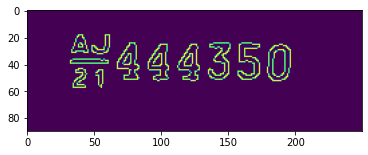

In [ ]:
path = data_path+"DATASETS/Nigerian Currency dataset/OGDONSET/200/200-3.jpg"

edged= process_image(path)
plt.imshow(edged)

Easyocr

1/1 [==============================] - 0s 18ms/step


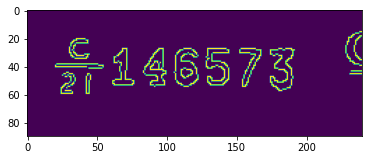

In [ ]:
edged= process_image(path)
plt.imshow(edged)

1/1 [==============================] - 0s 16ms/step


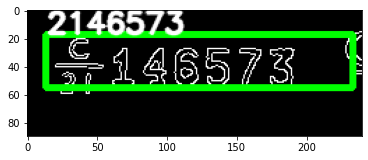

In [ ]:
#perform image preprocessing
edged= process_image(path)

#apply easy ocr
easyocr_out= apply_easyocr(edged)

# show output as an image
plt.imshow(easyocr_out[0])

Kerasocr

1/1 [==============================] - 0s 18ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


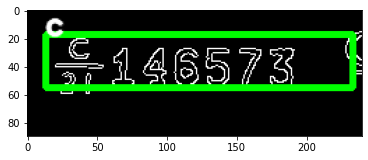

In [ ]:
#perform image preprocessing
edged= process_image(path)

# apply_kerasocr
kerasocr_out= apply_kerasocr(edged)

# show output as an image
plt.imshow(kerasocr_out[0])

Pytesseract

1/1 [==============================] - 0s 16ms/step


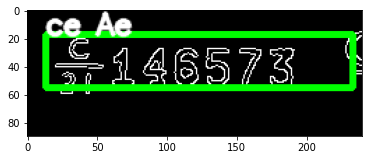

In [ ]:
#perform image preprocessing
edged= process_image(path)

# apply_kerasocr
pytesseract_out= apply_pytesseract(edged)

# show output as an image
plt.imshow(pytesseract_out[0])

In [ ]:
easyocr_out[1]

'2146573'

In [ ]:
print(easyocr_out[1], kerasocr_out[1], pytesseract_out[1])

2146573 c ce Ae


# Perform on all Images

In [ ]:
def read_paths_from_folder(folder_dir):
  import os 
  from os import listdir
  image_paths= []

  for images in os.listdir(folder_dir):
    if images.endswith(".jpg") or images.endswith(".jpg"):
      # print(images)
      image_paths.append(folder_dir+"/"+images)
  
  return image_paths
    
def read_images(image_paths):
  images_list= []
  for i in image_paths:
    img= cv2.imread(i, 1)
    images_list.append(img)
  
  return images_list

def read(folder_dir):
  return read_images(read_paths_from_folder(folder_dir))

def pred_currency(currency_list):
  images_pred= []
  edged_images= []
  
  for image in currency_list:
    li_pred= []
    edged= process_image(image)
    edged_images.append(edged)

    easyocr_out= apply_easyocr(edged)
    li_pred.append(easyocr_out[1])
    
    kerasocr_out= apply_kerasocr(edged)
    li_pred.append(kerasocr_out[1])
    
    pytesseract_out= apply_pytesseract(edged)
    li_pred.append(pytesseract_out[1])

    images_pred.append(li_pred)
    
  return [images_pred, edged_images]

import time
def view_results(num, li):
  images_pred, edged_images= li

  plt.imshow(edged_images[num])
  time.sleep(5)

  print("EASYOCR :- ", images_pred[num][0])
  print("KERAS OCR :- ", images_pred[num][1])
  print("PYTESSERACT :- ", images_pred[num][2])

In [16]:
folder_dir= data_path+"DATASETS/Nigerian Currency dataset/OGDONSET/200"

note_200= read(data_path+"DATASETS/Nigerian Currency dataset/OGDONSET/200")
note_500= read(data_path+"DATASETS/Nigerian Currency dataset/OGDONSET/500")
note_1000= read(data_path+"DATASETS/Nigerian Currency dataset/OGDONSET/1000")

In [17]:
pred_200= pred_currency(note_200)
pred_500= pred_currency(note_500)
pred_1000= pred_currency(note_1000)

1/1 [==============================] - 0s 16ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 14ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 15ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 15ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 14ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 17ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 14ms/step
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5

EASYOCR :-  43268799
KERAS OCR :-  288799
PYTESSERACT :-  ATW ATS


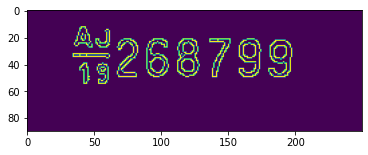

In [18]:
index= 0
currency= pred_200
view_results(num= index, li= currency)

EASYOCR :-  64833120
KERAS OCR :-  aa
PYTESSERACT :-  EES


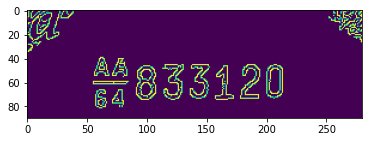

In [21]:
index= 0
currency= pred_500
view_results(num= index, li= currency)

EASYOCR :-  718696
KERAS OCR :-  e
PYTESSERACT :-  Per


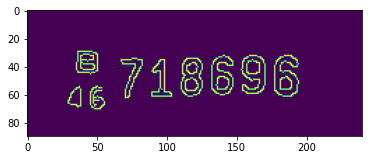

In [22]:
index= 0
currency= pred_1000
view_results(num= index, li= currency)